# import libraries

In [ ]:
#!pip install geopy

In [1]:
import requests
import pandas as pd
import numpy as np
import folium 
import geocoder
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from matplotlib import cm
from matplotlib import colors

# tranforming json file into a pandas dataframe library
import json
from pandas.io.json import json_normalize

# Reading boroughs of Osaka city from Wiki

In [2]:
url = 'https://en.wikipedia.org/wiki/Osaka#List_of_wards'
df = pd.read_html(url)[4]
df

,Unnamed: 0,Name,Kanji,Population,Land area in km2,Pop. density per km2,Map of Osaka
0,1,Abeno-ku,阿倍野区,107000,5.99,18440,NaN
1,2,Asahi-ku,旭区,90854,6.32,14376,NaN
2,3,Chūō-ku,中央区,100998,8.87,11386,NaN
3,4,Fukushima-ku,福島区,78348,4.67,16777,NaN
4,5,Higashinari-ku,東成区,83684,4.54,18433,NaN
5,6,Higashisumiyoshi-ku,東住吉区,126704,9.75,12995,NaN
6,7,Higashiyodogawa-ku,東淀川区,176943,13.27,13334,NaN
7,8,Hirano-ku,平野区,193282,15.28,12649,NaN
8,9,Ikuno-ku,生野区,129641,8.37,15489,NaN
9,10,Jōtō-ku,城東区,167925,8.38,20039,NaN


In [3]:
drop_col = ['Unnamed: 0','Kanji','Map of Osaka']
df=df.drop(drop_col,axis=1)
df

,Name,Population,Land area in km2,Pop. density per km2
0,Abeno-ku,107000,5.99,18440
1,Asahi-ku,90854,6.32,14376
2,Chūō-ku,100998,8.87,11386
3,Fukushima-ku,78348,4.67,16777
4,Higashinari-ku,83684,4.54,18433
5,Higashisumiyoshi-ku,126704,9.75,12995
6,Higashiyodogawa-ku,176943,13.27,13334
7,Hirano-ku,193282,15.28,12649
8,Ikuno-ku,129641,8.37,15489
9,Jōtō-ku,167925,8.38,20039


In [4]:
df.shape

(24, 4)

# Correction of extra notation of borough name

In [31]:
#df['Name'][10] = 'Kita-ku'

Acquiring and combining the latitude and longitude of each borough in Osaka City

In [6]:
latitude=[]
longitude=[]

geolocator = Nominatim(user_agent="Osaka")

num=list(range(24))


for i in num:
    location=geolocator.geocode(df['Name'][i])
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [7]:
df['latitude']=latitude
df['longitude']=longitude

df

,Name,Population,Land area in km2,Pop. density per km2,latitude,longitude
0,Abeno-ku,107000,5.99,18440,34.627501,135.514095
1,Asahi-ku,90854,6.32,14376,34.726483,135.546952
2,Chūō-ku,100998,8.87,11386,35.666255,139.775565
3,Fukushima-ku,78348,4.67,16777,34.692104,135.474812
4,Higashinari-ku,83684,4.54,18433,34.672912,135.550567
5,Higashisumiyoshi-ku,126704,9.75,12995,34.615662,135.531096
6,Higashiyodogawa-ku,176943,13.27,13334,34.740212,135.517432
7,Hirano-ku,193282,15.28,12649,34.603715,135.559027
8,Ikuno-ku,129641,8.37,15489,34.653003,135.547722
9,Jōtō-ku,167925,8.38,20039,34.693887,135.547769


# Mapping of boroughs in Osaka city

In [8]:
Name0=df['Name'][0]
lat0 = latitude[0]
long0 = longitude[0]

map_osaka = folium.Map(location=[lat0,long0],zoom_start=11)

In [9]:
for lat, long, label in zip(df['latitude'],df['longitude'],df['Name']):
    labe=folium.Popup(label,parse_htme=True)
    folium.CircleMarker(
    [lat,long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_osaka)

map_osaka

# Extract nearby Venue information from Foursquare and covert it to dataframe 

In [10]:
CLIENT_ID = '******' 
CLIENT_SECRET = '******' 
ACCESS_TOKEN = '*******' 
VERSION = '******'

In [11]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
Venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Abeno-ku
Asahi-ku
Chūō-ku
Fukushima-ku
Higashinari-ku
Higashisumiyoshi-ku
Higashiyodogawa-ku
Hirano-ku
Ikuno-ku
Jōtō-ku
Kita-ku
Konohana-ku
Minato-ku
Miyakojima-ku
Naniwa-ku
Nishi-ku
Nishinari-ku
Nishiyodogawa-ku
Suminoe-ku
Sumiyoshi-ku
Taishō-ku
Tennōji-ku
Tsurumi-ku
Yodogawa-ku


In [13]:
Venues.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abeno-ku,34.627501,135.514095,Usagi to Boku (うさぎとぼく),34.629734,135.515104,Coffee Shop
1,Abeno-ku,34.627501,135.514095,ライフ セントラルスクエア 北畠店,34.626273,135.509131,Supermarket
2,Abeno-ku,34.627501,135.514095,FamilyMart (ファミリーマート 阿倍野昭和町店),34.627117,135.516143,Convenience Store
3,Abeno-ku,34.627501,135.514095,7-Eleven (セブンイレブン 大阪阪南町3丁目店),34.628868,135.514661,Convenience Store
4,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,34.630623,135.516397,Fast Food Restaurant
5,Abeno-ku,34.627501,135.514095,Lawson Store 100 (ローソンストア100 阿倍野阪南町店),34.631605,135.515259,Convenience Store
6,Abeno-ku,34.627501,135.514095,FamilyMart (ファミリーマート 阿倍野元町店),34.629293,135.509100,Convenience Store
7,Abeno-ku,34.627501,135.514095,生駒湯,34.626801,135.515102,Spa
8,Abeno-ku,34.627501,135.514095,ヤマト運輸 昭和町センター,34.626532,135.516027,Shipping Store
9,Abeno-ku,34.627501,135.514095,阪南公園,34.626358,135.511838,Park


In [14]:
len(Venues)

584

#  Summarize by "Neighborhood" variables to understand major Venue

In [15]:
Venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abeno-ku,19,19,19,19,19,19
Asahi-ku,23,23,23,23,23,23
Chūō-ku,88,88,88,88,88,88
Fukushima-ku,51,51,51,51,51,51
Higashinari-ku,4,4,4,4,4,4
Higashisumiyoshi-ku,16,16,16,16,16,16
Higashiyodogawa-ku,29,29,29,29,29,29
Hirano-ku,5,5,5,5,5,5
Ikuno-ku,13,13,13,13,13,13


In [16]:
Venues_onehot = pd.get_dummies(Venues[['Venue Category']], prefix="", prefix_sep="")
Venues_onehot.insert(loc=0, column='Neighborhood', value=Venues['Neighborhood'] )
Venues_onehot.shape

(584, 118)

In [17]:
Venues_grouped = Venues_onehot.groupby('Neighborhood').mean().reset_index()
Venues_grouped.head()

,Neighborhood,ATM,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Baseball Field,...,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Game Store,Wagashi Place,Waterfall,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0.000000,0.0,0.052632,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.052632,0.0,0.0,0.0,0.000000,0.000000
1,Asahi-ku,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.0,0.043478,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,Chūō-ku,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.034091,0.0,...,0.0,0.000000,0.022727,0.0,0.000000,0.0,0.0,0.0,0.011364,0.022727
3,Fukushima-ku,0.019608,0.0,0.000000,0.0,0.0,0.0,0.00,0.019608,0.0,...,0.0,0.019608,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,Higashinari-ku,0.000000,0.0,0.000000,0.0,0.0,0.0,0.25,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


# Sort by category and creating the top 10 major Venues dataframe

In [18]:
def major_venues(row, num):
    row_categories = row.iloc[1:]
    row_sorted = row_categories.sort_values(ascending=False)
    
    return row_sorted.index.values[0:num]

In [19]:
num = 10
columns = ['Neighborhood', '1st ', '2nd ', '3rd ', '4th','5th', '6th', '7th', '8th', '9th', '10th']

In [20]:

sorted_df = pd.DataFrame(columns=columns)
sorted_df['Neighborhood'] = Venues_grouped['Neighborhood']

for i in np.arange(Venues_grouped.shape[0]):
    sorted_df.iloc[i, 1:] = major_venues(Venues_grouped.iloc[i, :], num)

sorted_df.head()

,Neighborhood,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,Abeno-ku,Convenience Store,Café,Japanese Curry Restaurant,Steakhouse,Coffee Shop,Spa,Park,Historic Site,Liquor Store,Shipping Store
1,Asahi-ku,Convenience Store,Sake Bar,Donburi Restaurant,Tonkatsu Restaurant,Dry Cleaner,Fast Food Restaurant,Dessert Shop,North Indian Restaurant,Chinese Restaurant,Supermarket
2,Chūō-ku,Sushi Restaurant,Japanese Restaurant,Convenience Store,Coffee Shop,Park,Soba Restaurant,Bakery,Italian Restaurant,Yoshoku Restaurant,Grocery Store
3,Fukushima-ku,Convenience Store,Fast Food Restaurant,Ramen Restaurant,Train Station,Donburi Restaurant,Sake Bar,Chinese Restaurant,Supermarket,Restaurant,Bookstore
4,Higashinari-ku,Shopping Mall,BBQ Joint,Convenience Store,Café,Grocery Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court


# K-means cluster analysis 

In [21]:

clusters = 2

Venues_clustering = Venues_grouped.drop('Neighborhood', 1)


kmeans = KMeans(n_clusters=clusters, random_state=0).fit(Venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

In [30]:
#sorted_df.insert(0, 'Cluster_label_bi', kmeans.labels_)

labeled_data = df.join(sorted_df.set_index('Neighborhood'), on='Name')

labeled_data

labeled_data.to_csv('labeled_data.csv')

# Plot Venues per cluster on a Osaka's map 

In [23]:
address = 'Abeno-ku'

geolocator = Nominatim(user_agent="Osaka")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('lat:{}, lng:{}.'.format(latitude, longitude))

lat:[34.627501, 34.726483, 35.666255, 34.692104, 34.672912, 34.615662, 34.740212, 34.603715, 34.653003, 34.693887, 35.755838, 34.676245, 35.6432274, 34.712703, 34.66283, 34.674598, 34.639074, 34.705938, 34.614132, 34.599765, 34.65064, 34.655043, 35.480132, 34.726613], lng:[135.514095, 135.546952, 139.775565, 135.474812, 135.550567, 135.531096, 135.517432, 135.559027, 135.547722, 135.547769, 139.736687, 135.43555, 139.7400553, 135.529697, 135.490485, 135.476774, 135.490813, 135.442936, 135.466545, 135.506426, 135.46957, 135.51837, 139.69366289438247, 135.483397].


In [24]:
map_clusters = folium.Map(location=[latitude1, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(labeled_data['latitude'], labeled_data['longitude'], labeled_data['Name'], labeled_data['Cluster_label_bi']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
#map_clusters


In [25]:
map_clusters

# Reading Life Expectany Data of Osaka City 

In [27]:
osaka_data=pd.read_csv("**/Osaka.csv")

In [28]:
osaka_data

,Unnamed: 0,Life_Expectany_Men,Life_Expectancy_Women
0,Abeno-ku,79.1,85.8
1,Asahi-ku\t,77.5,85.3
2,Ch__-ku\t,78.3,84.8
3,Fukushima-ku,78.4,85.7
4,Higashinari-ku,78.4,85.4
5,Higashisumiyoshi-ku,77.3,85.7
6,Higashiyodogawa-ku,77.2,84.3
7,Hirano-ku,78.0,84.8
8,Ikuno-ku,76.7,85.4
9,J_t_-ku\t,78.8,85.9


# Comparison of average life expectancy between clusters

In [113]:
from scipy import stats
from pandas.plotting import scatt
import matplotlib.pyplot as plt

In [98]:
osaka_data.columns


Index(['Unnamed: 0', '\tcluster', 'Aging_index\t', 'LE_Men', 'LE_Women',
       'Unemployment'],
      dtype='object')

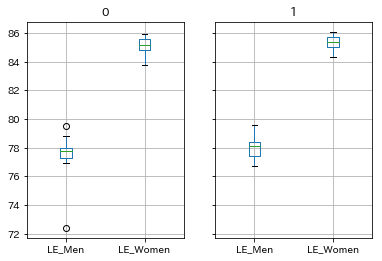

In [115]:
groupby_cluster=osaka_data.groupby('\tcluster')
groupby_cluster.boxplot(column=[ 'LE_Men', 'LE_Women'])
plt.show()

In [101]:
G0_LE_Men=osaka_data[osaka_data['\tcluster']==0]['LE_Men']
G1_LE_Men=osaka_data[osaka_data['\tcluster']==1]['LE_Men']

stats.ttest_ind(G0_LE_Men,G1_LE_Men)

Ttest_indResult(statistic=-1.244196242041899, pvalue=0.22652071316922129)

In [102]:
G0_LE_Women=osaka_data[osaka_data['\tcluster']==0]['LE_Women']
G1_LE_Women=osaka_data[osaka_data['\tcluster']==1]['LE_Women']

stats.ttest_ind(G0_LE_Women,G1_LE_Women)

Ttest_indResult(statistic=-0.78887437386521186, pvalue=0.4386045836541046)